In [231]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from sympy import *
%matplotlib inline

# Questão 1

In [232]:
def newton(f, f_derivada, a, tol=1e-10, maxiter=200):
    y =  a 
    cont = 0
    erro = 100
    
    while (erro > tol and cont < maxiter):
        f_y = f(y)
        derivada_y = f_derivada(y)
        
        if derivada_y == 0:
            return 
        
        y2 = y - (f_y/derivada_y)  
        erro = np.abs((y2 - y) / np.abs(y2))  
        
        if erro <= tol:
            break 
        
        y = y2
        cont += 1

    return "Raiz: " + str(y2)

In [233]:
def ponto_fixo(f, a, maxiter, xtol=1e-10):
    cont = 0
    
    while cont < maxiter:
        y = f(a)
        erro = np.abs(a - y)
        
        if erro <= xtol:
            a, y, cont
        
        a = y
        cont += 1
    return a, y, cont

In [234]:
def secante(f, a, b, tol=1e-10, maxiter=200):
    if f(a) * f(b) >= 0:
        return
    
    erro = 1000;
    cont = 0
    
    while (erro > tol and cont < maxiter):
        f_a = f(a)
        f_b = f(b)
        y = (a * f_b - b * f_a) / (f_b - f_a)
        x = f_a * f(y)
        
        if(x == 0):
            return y, cont
        else:
            a = b
            b = y
            y2 = y
            erro = np.abs(y2 - y)
            
        if erro <= tol:
            break  
        cont += 1

    return "Raiz: " + str(y2)

In [247]:
def falsa(f, a, b, tol, maxiter):
    
    x2 = a - (f(a)*(b-a)/(f(b)-f(a)))
    cont = 0
    erro = 1 
    
    while (erro > tol and cont < maxiter):
        
        x = a - (f(a)*(b-a)/(f(b)-f(a)))
        
        if (np.sign(f(a)) * np.sign(f(x2)) > 0): a = x

        else: b = x
            
        if( cont != 0):
            erro  = np.abs(x - x2)/x 
        
        cont += 1      
        x2 = x
         
    return "Iteração: " + str(cont), "Raiz: " + str(x2)

# Questão 2

In [236]:
def f(x): return 2 * np.sin(np.sqrt(x)) - x
ponto_fixo(f, a=0.5, maxiter=200, xtol=0.001)

(0.7686488567609493, 0.7686488567609493, 200)

# Questão 3

In [237]:
def raiz_real(x): return 2*(x**3) - 11.7*(x**2) + 17.7*x - 5
def raiz_real_iso(x): return 2*(x**3) - 11.7*(x**2) + 18.7*x - 5
def raiz_real_derivada(x): return 6*(x**2) - 23.4*(x) + 17.7

## **(a)**

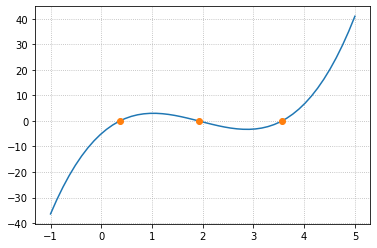

In [238]:
raiz1 = opt.root(raiz_real, 0)
raiz2 = opt.root(raiz_real, 2)
raiz3 = opt.root(raiz_real, 3)
raizes = np.array([raiz1.x, raiz2.x, raiz3.x])

fig = plt.figure()
ax = fig.add_subplot()

x = np.linspace(-1,5)
plt.plot(x,raiz_real(x))
ax.plot(raizes, raiz_real(raizes), 'o')
plt.grid(ls=':')

## **(b)**

In [239]:
ponto_fixo(raiz_real, 3, 3)

(-30850678.958379168, -30850678.958379168, 3)

## **(c)**

In [240]:
newton(raiz_real, raiz_real_derivada, 3, maxiter=3)

'Raiz: 3.7929344806432264'

## **(d)**

In [241]:
secante(raiz_real, 4, 3, 3)

'Raiz: 3.326530612244898'

# Questão 4

## **(a)**

In [242]:
def f1(x): return 2*(x**4) + 4*(x**3) + 3*(x**2) - 10*x - 15
def f1_isolado(x): return (15)/(2*(x**3) + 4*(x**2) + 3*(x) - 10)
def f1_derivada(x): return  8*(x**3) + 12*(x**2) + 6*x - 10

**Método da Bisseção**

In [243]:
%timeit opt.root_scalar(f1,method='bisect',bracket=[0,3], rtol = 10**(-10), maxiter =200 )
opt.root_scalar(f1,method='bisect',bracket=[0,3], rtol = 10**(-10), maxiter = 200)

59.3 µs ± 7.59 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 37
     iterations: 35
           root: 1.4928787086100783

**Método da falsa posição**

In [248]:
%timeit falsa(f1,0 ,3,1e-10,200)
falsa(f1, 0, 3, 1e-10, 200)

618 µs ± 27.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


('Iteração: 64', 'Raiz: 1.492878708406769')

**Método do ponto fixo**

In [250]:
%timeit opt.fixed_point(f1_isolado,1.5, xtol = 10**(-10), maxiter =200)
opt.fixed_point(f1_isolado,1.5, xtol = 10**(-10), maxiter = 200)

813 µs ± 76.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


array(1.49287871)

**Método de Newton-Raphson**

In [251]:
%timeit opt.root_scalar(f1, fprime = f1_derivada, x0 = 1.5, method='newton',maxiter = 200)
opt.root_scalar(f1, fprime = f1_derivada, x0 = 1, method='newton',maxiter = 200)

185 µs ± 16.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 14
     iterations: 7
           root: 1.4928787086636037

**Método da secante**

In [252]:
%timeit opt.root_scalar(f1, x0= 0, x1 = 3, method='secant', maxiter = 200)
opt.root_scalar(f1, x0= 0, x1 = 3, method='secant', maxiter = 200)

576 µs ± 31.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 11
           root: -1.3003841326439196

## **(b)**

In [253]:
def f2(x): return (x + 3)*(x + 1)*(x - 2)**3
def f2_isolado(x): return (24)/((x**4) - 2*(x**3) - 9*(x**2) + 22*x + 4) 
def f2_derivada(x): return 2*x*(x-2)**3 + 4*(x-2)**3 + 3*(x)**4 - 27*(x)**2 + 12*x + 36

**Método da Bisseção**

In [254]:
%timeit opt.root_scalar(f2,method='bisect',bracket=[0,5], rtol = 10**(-10), maxiter =200 )
opt.root_scalar(f2,method='bisect',bracket=[0,5], rtol = 10**(-10), maxiter = 200 )

39.9 µs ± 11.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 37
     iterations: 35
           root: 1.9999999999708962

**Método da falsa posição**

In [255]:
%timeit falsa(f2,0 , 5, 1e-10, 200)
falsa(f2, 0, 5, 1e-10, 200)

1.53 ms ± 146 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


('Iteração: 200', 'Raiz: 1.714409136227646')

**Método do ponto fixo**

In [256]:
%timeit opt.fixed_point(f2_isolado,1.5, xtol = 10**(-10), maxiter = 200)
opt.fixed_point(f2_isolado,1.5, xtol = 1e-10, maxiter = 200)

4.12 ms ± 673 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


array(1.99964491)

**Método de Newton-Raphson**

In [257]:
%timeit opt.root_scalar(f2, fprime = f2_derivada, x0 = 0, method='newton',maxiter = 200)
opt.root_scalar(f2, fprime = f2_derivada, x0 = 0, method='newton',maxiter = 200)

2.72 ms ± 410 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


      converged: True
           flag: 'converged'
 function_calls: 100
     iterations: 50
           root: 2.0000000167022742

**Método da secante**

In [282]:
%timeit opt.root_scalar(f2, x0= 0, x1 = 5, method='secant', maxiter = 200)
opt.root_scalar(f2, x0= 0, x1 = 5, method='secant', maxiter = 200)

2.29 ms ± 97.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


      converged: True
           flag: 'converged'
 function_calls: 61
     iterations: 60
           root: 2.00000003865488

## **(c)**

In [259]:
def f3(x): return 5*x**3 + x**2 - np.e**(1-2*x) + np.cos(x) + 20
def f3_isolado(x): return 5*x**3 + x**2 - np.e**(1-2*x) + np.cos(x) + 20 + x
def f3_derivada(x): return 15*(x**2) + 2*x + 2*np.e**(1 - 2*x) - np.sin(x)

**Método da Bisseção**

In [260]:
%timeit opt.root_scalar(f3,method='bisect',bracket=[-5,5], rtol = 10**(-10), maxiter =200 )
opt.root_scalar(f3,method='bisect',bracket=[-5,5], rtol = 10**(-10), maxiter = 200)

119 µs ± 4.15 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 39
     iterations: 37
           root: -0.9295604598446516

**Método da falsa posição**

In [261]:
%timeit falsa(f3,-5 , 5, 1e-10, 200)
falsa(f3, -5, 5, 1e-10, 200)

5.27 ms ± 132 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


('Iteração: 200', 'Raiz: 1.568769261078005')

**Método do ponto fixo**

In [262]:
%timeit opt.fixed_point(f3_isolado,-1, xtol = 10**(-10), maxiter =200)
opt.fixed_point(f3_isolado,-1, xtol = 10**(-10), maxiter = 200)

5.9 ms ± 284 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


array(-0.92956046)

**Método de Newton-Raphson**

In [263]:
%timeit opt.root_scalar(f3, fprime = f3_derivada, x0 = 4, method='newton',maxiter = 200)
opt.root_scalar(f3, fprime = f3_derivada, x0 = 4, method='newton',maxiter = 200)

721 µs ± 8.65 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 28
     iterations: 14
           root: -0.9295604598378413

**Método da secante**

In [264]:
%timeit opt.root_scalar(f3, x0= -1, x1 = 1, method='secant', maxiter = 200)
opt.root_scalar(f3, x0= -1, x1 = 1, method='secant', maxiter = 200)

422 µs ± 13.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: -0.9295604598378413

## **(d)**

In [265]:
def f4(x): return np.sin(x)*x + 4
def f4_isolado(x): return (-4)/np.sin(x)
def f4_derivada(x): return x*np.cos(x) + np.sin(x)

**Método da Bisseção**

In [266]:
%timeit opt.root_scalar(f4,method='bisect',bracket=[1,5], rtol = 10**(-10), maxiter =200 )
opt.root_scalar(f4,method='bisect',bracket=[1,5], rtol = 10**(-10), maxiter = 200)

77.4 µs ± 3.81 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 36
     iterations: 34
           root: 4.323239543708041

**Método da falsa posição**

In [267]:
%timeit falsa(f4, 1, 5, 1e-10, 200)
falsa(f4, 1, 5, 1e-10, 200)

185 µs ± 5.95 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


('Iteração: 10', 'Raiz: 4.323239543723117')

**Método do ponto fixo**

In [268]:
%timeit opt.fixed_point(f4_isolado,4, xtol = 10**(-10), maxiter =200)
opt.fixed_point(f4_isolado,4, xtol = 10**(-10), maxiter = 200)

1.36 ms ± 304 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


array(4.32323954)

**Método de Newton-Raphson**

In [269]:
%timeit opt.root_scalar(f4, fprime = f4_derivada, x0 = 4, method='newton',maxiter = 200)
opt.root_scalar(f4, fprime = f4_derivada, x0 = 4, method='newton',maxiter = 200)

440 µs ± 182 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 5
           root: 4.323239543713714

**Método da secante**

In [270]:
%timeit opt.root_scalar(f4, x0= 4, x1 = 5, method='secant', maxiter = 200)
opt.root_scalar(f4, x0= 4, x1 = 5, method='secant', maxiter = 200)

469 µs ± 45.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 4.323239543713714

## **(e)**

In [271]:
def f5(x): return (x-3)**5 * np.log(x) 
def f5_isolado(x): return (x-3)**5 * np.log(x) + x
def f5_derivada(x): return 20*(4*x -3)**4 +((4*x -3)**5)/x

**Método da Bisseção**

In [272]:
%timeit opt.root_scalar(f5,method='bisect',bracket=[2,5], rtol = 10**(-10), maxiter =200 )
opt.root_scalar(f5,method='bisect',bracket=[2,5], rtol = 10**(-10), maxiter = 200)

81.8 µs ± 6.96 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 36
     iterations: 34
           root: 2.9999999999417923

**Método da falsa posição**

In [273]:
%timeit falsa(f5,2,5,1e-10,200)
falsa(f5, 2, 5, 1e-10, 200)

5.13 ms ± 650 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


('Iteração: 200', 'Raiz: 2.5939097642054603')

**Método do ponto fixo**

In [274]:
%timeit opt.fixed_point(f5_isolado,2.5, xtol = 10**(-10), maxiter =200)
opt.fixed_point(f5_isolado,2.5, xtol = 10**(-10), maxiter= 200)

RuntimeError: Failed to converge after 200 iterations, value is 2.989033570607521

**Método de Newton-Raphson**

In [276]:
%timeit opt.root_scalar(f5, fprime = f5_derivada, x0 = 2.9, method='newton',maxiter = 200)
opt.root_scalar(f5, fprime = f5_derivada, x0 = 2.9, method='newton',maxiter = 200)

65.4 µs ± 7.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 2
     iterations: 1
           root: 2.9000000000847543

**Método da secante**

In [275]:
%timeit opt.root_scalar(f5, x0= 2.9, x1 = 3.5, method='secant', maxiter = 200)
opt.root_scalar(f5, x0= 2.9, x1 = 3.5, method='secant', maxiter = 200)

4.48 ms ± 410 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


      converged: True
           flag: 'converged'
 function_calls: 93
     iterations: 92
           root: 2.9999999155028503

## **(f)**

In [ ]:
def f6(x): return (x)**10 -1
def f6_isolado(x): return  1/(x)**9
def f6_derivada(x): return 10*(x)**9

**Método da Bisseção**

In [277]:
%timeit opt.root_scalar(f6,method='bisect',bracket=[0.8,1.2], rtol = 10**(-10), maxiter =200 )
opt.root_scalar(f6,method='bisect',bracket=[0.8,1.2], rtol = 10**(-10), maxiter = 200)

11.9 µs ± 1.23 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 3
     iterations: 1
           root: 1.0

**Método da falsa posição**

In [278]:
%timeit falsa(f6, 0.8, 1.2, 1e-10, 200)
falsa(f6, 0.8, 1.2, 1e-10, 200)

258 µs ± 12.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


('Iteração: 45', 'Raiz: 0.9999999999002991')

**Método do ponto fixo**

In [279]:
%timeit opt.fixed_point(f6_isolado,1, xtol = 10**(-10), maxiter = 200)
opt.fixed_point(f6_isolado,1, xtol = 10**(-10), maxiter = 200)

163 µs ± 17.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


array(1.)

**Método de Newton-Raphson**

In [280]:
%timeit opt.root_scalar(f6, fprime = f6_derivada, x0 = 0.5, method='newton',maxiter = 200)
opt.root_scalar(f6, fprime = f6_derivada, x0 = 0.5, method='newton',maxiter = 200)

1.85 ms ± 315 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


      converged: True
           flag: 'converged'
 function_calls: 86
     iterations: 43
           root: 1.0

**Método da secante**

In [281]:
%timeit opt.root_scalar(f6, x0= 0.8, x1 = 1.2, method='secant', maxiter = 200)
opt.root_scalar(f6, x0= 0.8, x1 = 1.2, method='secant', maxiter = 200)

402 µs ± 14.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 11
     iterations: 10
           root: 0.9999999999999333